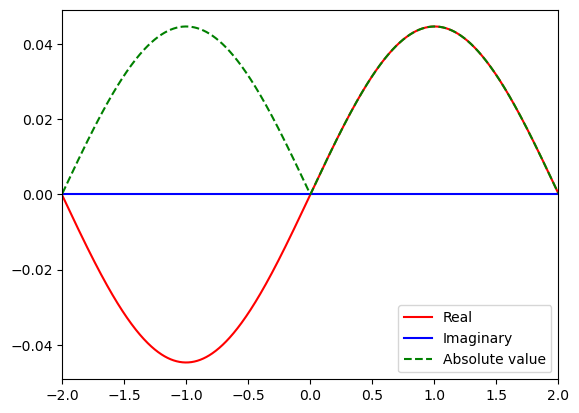

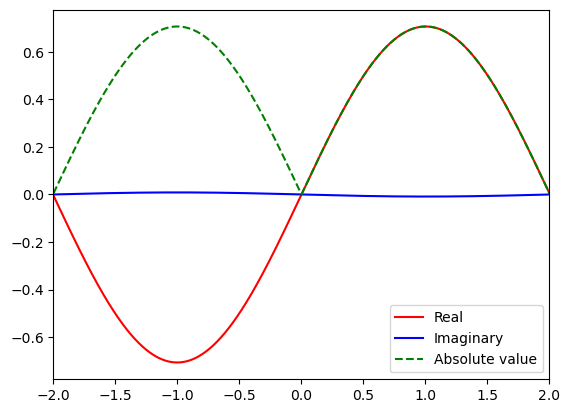

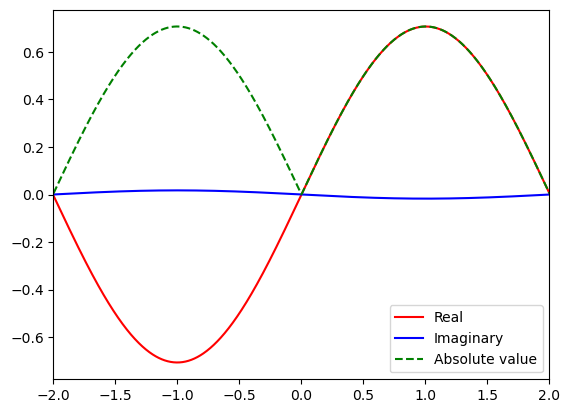

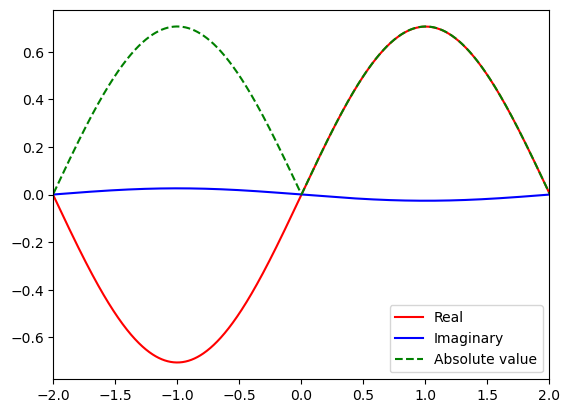

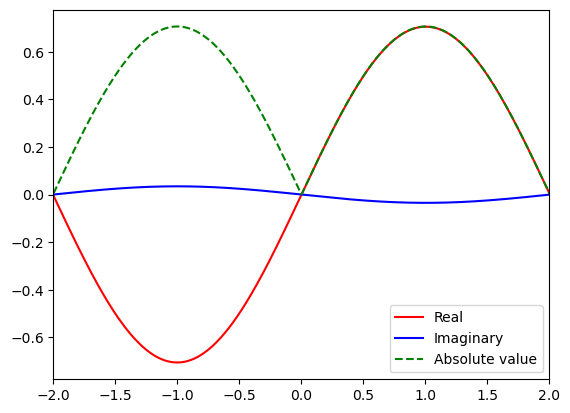

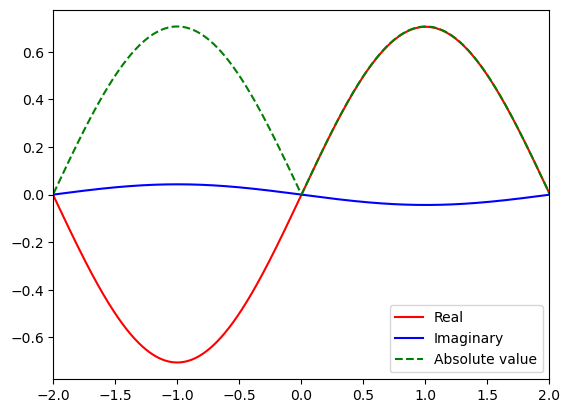

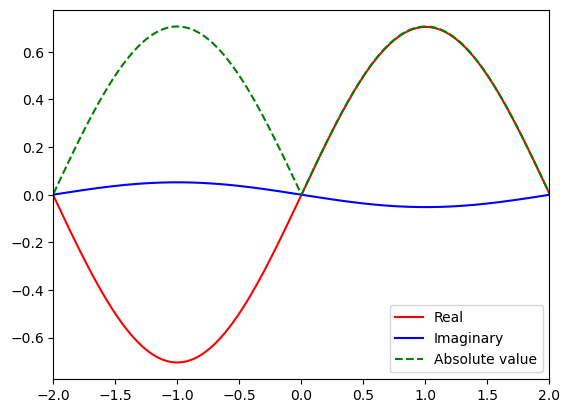

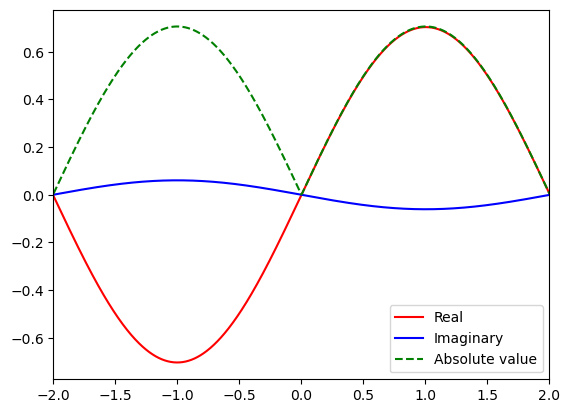

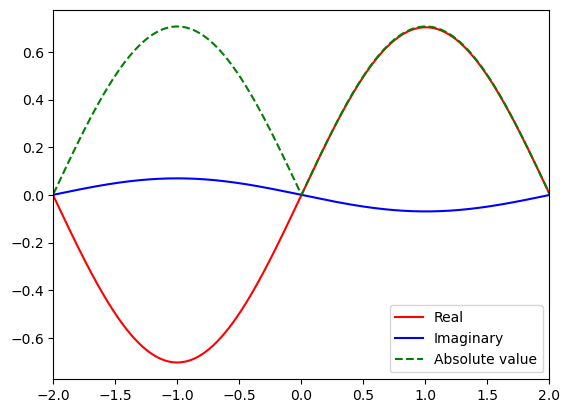

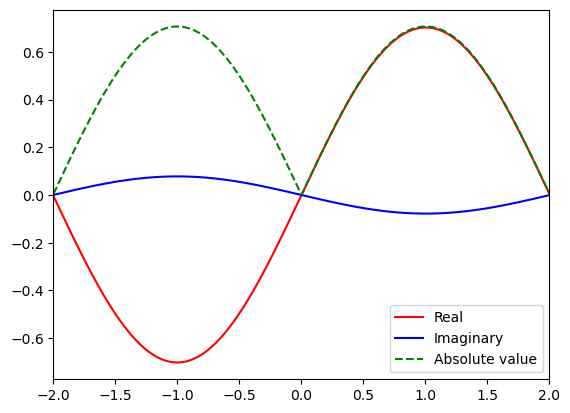

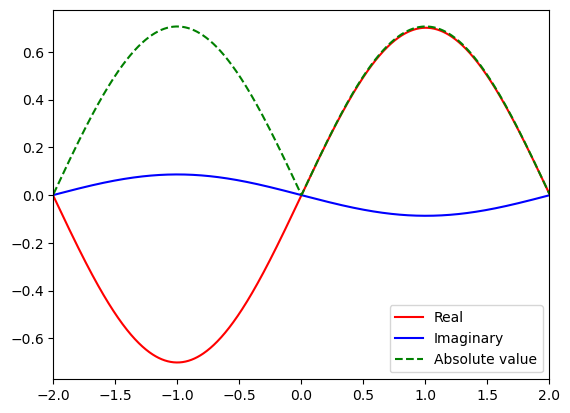

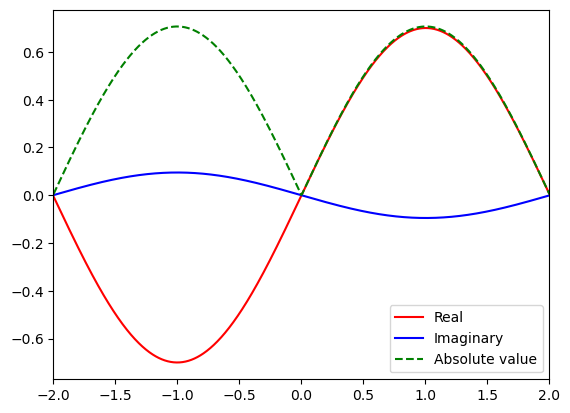

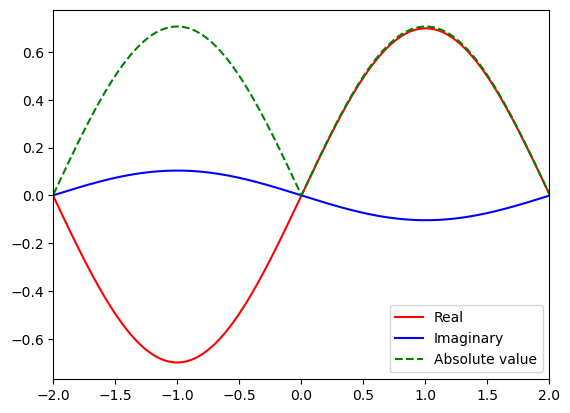

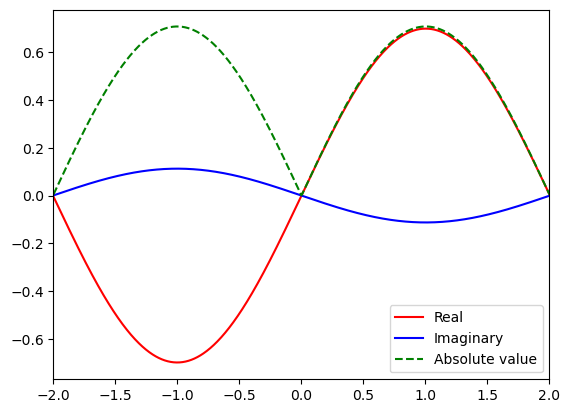

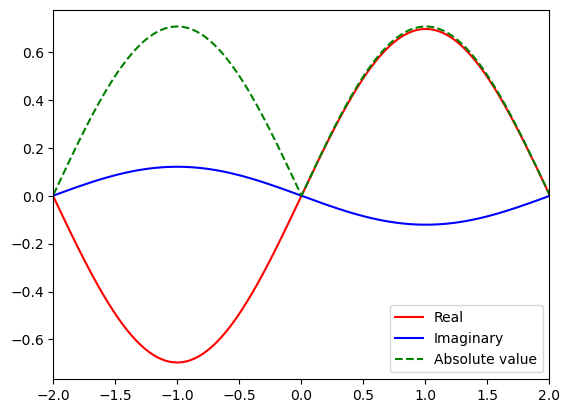

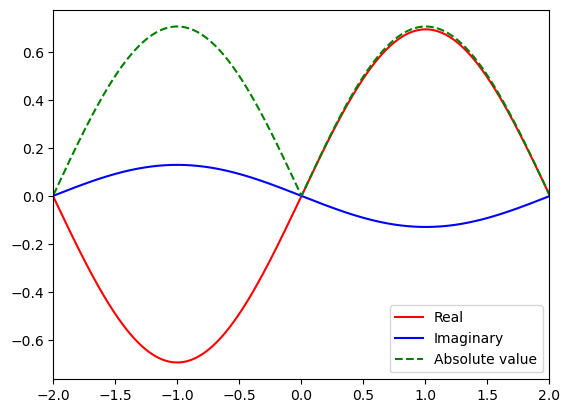

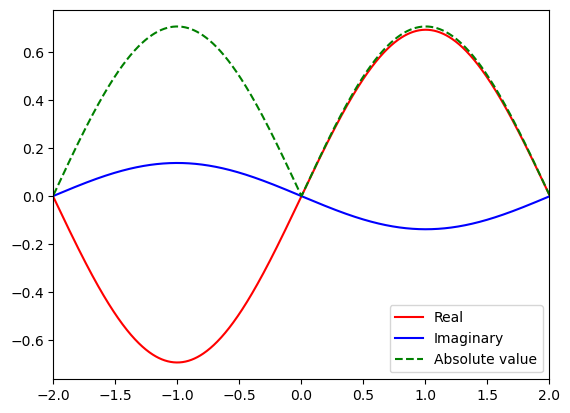

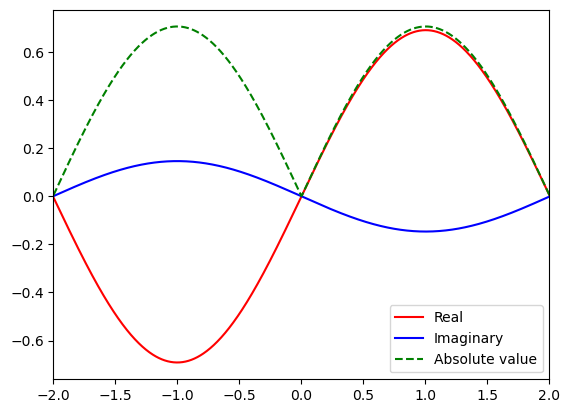

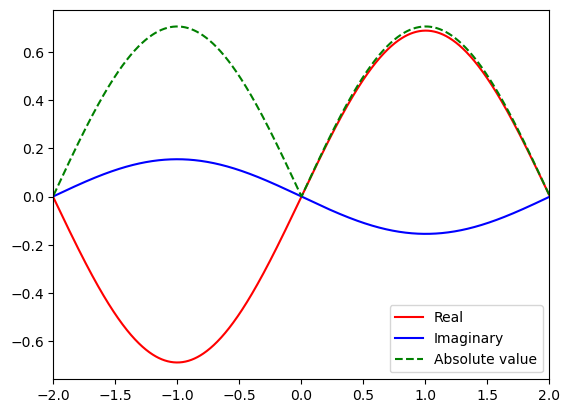

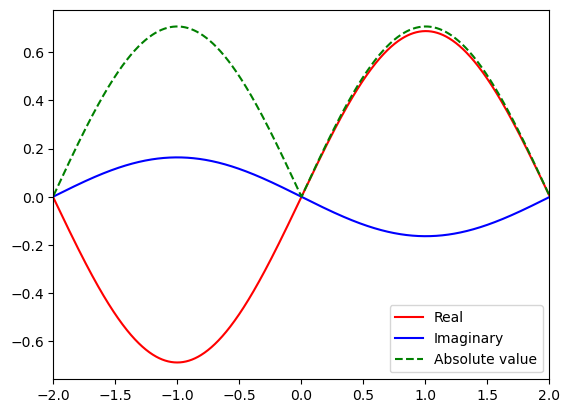

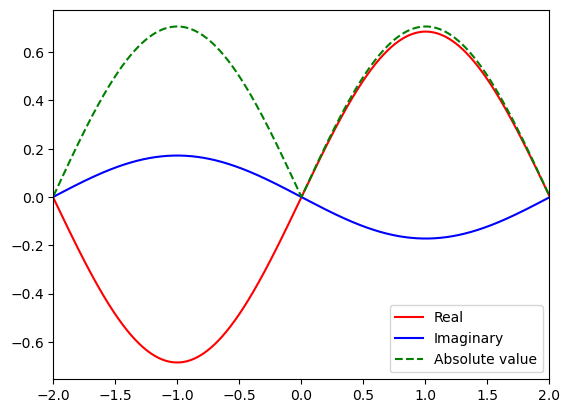

In [3]:
import numpy as np
steps= 1000
hbar = 1
m=10.0
x = np.linspace(-2,2,steps)
dx = x[1]-x[0]

Laplacian = ((-2.0*np.diag(np.ones(steps)))
             + np.diag(np.ones(steps-1),-1)
             + np.diag(np.ones(steps-1),1))/(dx*dx)

Hamiltonian = ((-0.5*hbar*hbar)/m)*Laplacian
eigenvalues, eigenvectors = np.linalg.eigh(Hamiltonian)

#for every psi, returns normalized psi
def norm(psi,dx):
    norm = np.sum(np.square(np.abs(psi)))*dx
    return psi/np.sqrt(norm)


def d_dx2(phi, x=x):
    ret = -2*phi
    ret[:-1] += phi[1:]
    ret[1:]+= phi[:-1]
    return ret/(dx*dx)

def d_dt(psi, hbar = 1, m=100, V=0):
    return (1j*hbar/(2*m) ) * d_dx2(psi) -(1j/hbar)*V*psi


def euler(phi, dt, **kwargs):
    return phi + dt * d_dt(phi, **kwargs)

def rk4(phi, dt, **kwargs):
    k1 = d_dt(phi, **kwargs)
    k2 = d_dt(phi+dt/2*k1, **kwargs)
    k3 = d_dt(phi+dt/2*k2, **kwargs)
    k4 = d_dt(phi+dt*k3, **kwargs)
    return phi + dt/6*(k1+2*k2+2*k3+k4)



t_max = 20001

psi0 = eigenvectors[:, 1]
answer= [np.copy(psi0)]
dt = 0.002
import matplotlib.pyplot as plt
for t in range(0, t_max):
    answer.append(norm(rk4(answer[t-1],dt,V=0),dx))
    plt.xlim(-2,2)
    if(t%1000 == 0):
        plt.plot(x, np.real(answer[t]),'r',label="Real")
        plt.plot(x, np.imag(answer[t]),'b',label="Imaginary")
        plt.plot(x, np.abs(answer[t]),'g--',label="Absolute value")
        plt.legend()
        plt.show()


# برای رسم تمرین ۱۸ و ۲۰ آذر ۱۴۰۲ -- معادله لاپلاس میتوانید از مثال فرضی زیر کمک بگیرید

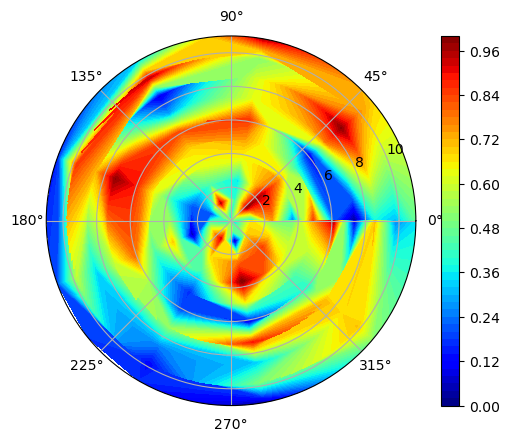

In [2]:
import matplotlib.pyplot as plt
import numpy as np
colourMap = plt.cm.jet
radius_mesh = 10
angle_mesh = 10
r_max = 11
a_max = 360
vGrid =  np.random.random((radius_mesh, angle_mesh))
radius_range = np.radians(np.linspace(0, a_max, angle_mesh))
angle_range = np.linspace(0, r_max, radius_mesh)
radius, angle = np.meshgrid(radius_range, angle_range)

colorinterpolation = 50
colourMap = plt.cm.jet
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
pt = ax.contourf(radius, angle, vGrid, colorinterpolation, cmap=colourMap)
fig.colorbar(pt)
plt.show()